In [1]:
from pyinsurance.data.IRX import load as load_safe_asset
from pyinsurance.data.sp500 import load as load_risk_asset

lock_in_rate = 0.05 # lock-in rate
mcr = 0.80 # minimum capital requirement
tmrcr = 0.80 # target minimum risk capital requirement
fund = 100  # initial fund
multiplier = 10 # risk multiplier

br = rr = load_risk_asset()
rf = load_safe_asset()

In [6]:
from pyinsurance.portfolio.tipp import TIPP

tipp = TIPP(
    capital=fund,
    rr=rr["Adj Close"].to_numpy(),
    rf=rf["Adj Close"].to_numpy(),
    lock_in=lock_in_rate,
    min_risk_req=tmrcr,
    min_capital_req=mcr,
    multiplier=multiplier
)

print("TIPP model initialized")
print(tipp)

tipp.run()

TIPP model initialized
TIPP Model Summary
            -----------------
            Capital: 100.00
            Lock-in rate: 5.00%
            Minimum risk requirement: 80.00%
            Minimum capital requirement: 80.00%
            Multiplier: 10.00


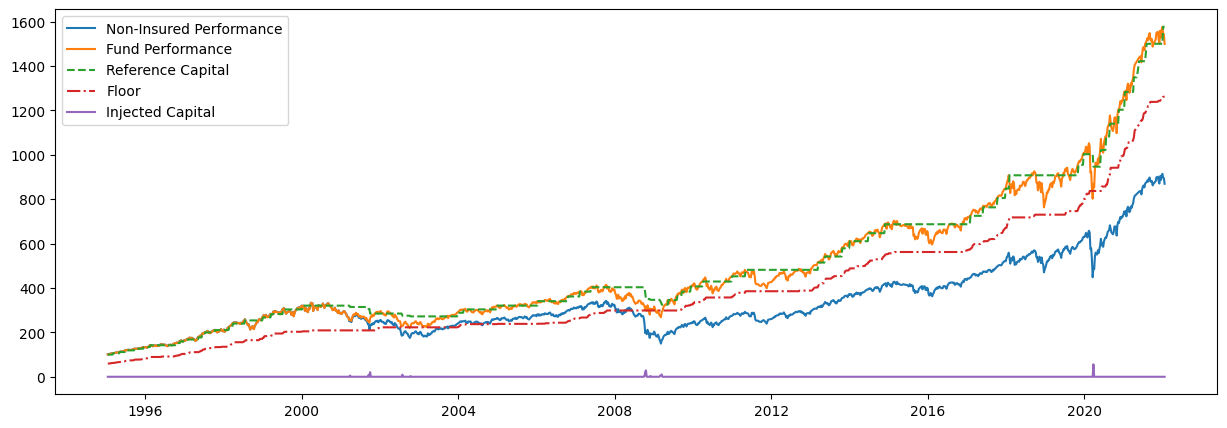

In [7]:
import matplotlib.pyplot as plt
from pyinsurance.metrics.metrics import Metrics

metrics = Metrics(
    rr=rr["Adj Close"].to_numpy(),
    br=br["Adj Close"].to_numpy(),
    rf=rf["Adj Close"].to_numpy(),
    freq=252
)

fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(111)

plt.plot(rr.index, 100 * metrics.cum_ret(), label = 'Non-Insured Performance')
plt.plot(rr.index, tipp.portfolio, label = 'Fund Performance')
plt.plot(rr.index, tipp.ref_capital, label = 'Reference Capital', linestyle="--")
plt.plot(rr.index, tipp.floor, label = 'Floor', linestyle="-.")
plt.plot(rr.index, tipp.margin_trigger, label = 'Injected Capital')

plt.legend()
plt.show()

In [8]:
tipp.portfolio
#array([ 100.92293836,  100.66519957,  101.8802548 , ..., 1547.78385547,
#       1543.09132786, 1500.04013407], shape=(1372,))

array([ 100.92293836,  100.66519957,  101.8802548 , ..., 1547.78385547,
       1543.09132786, 1500.04013407], shape=(1372,))

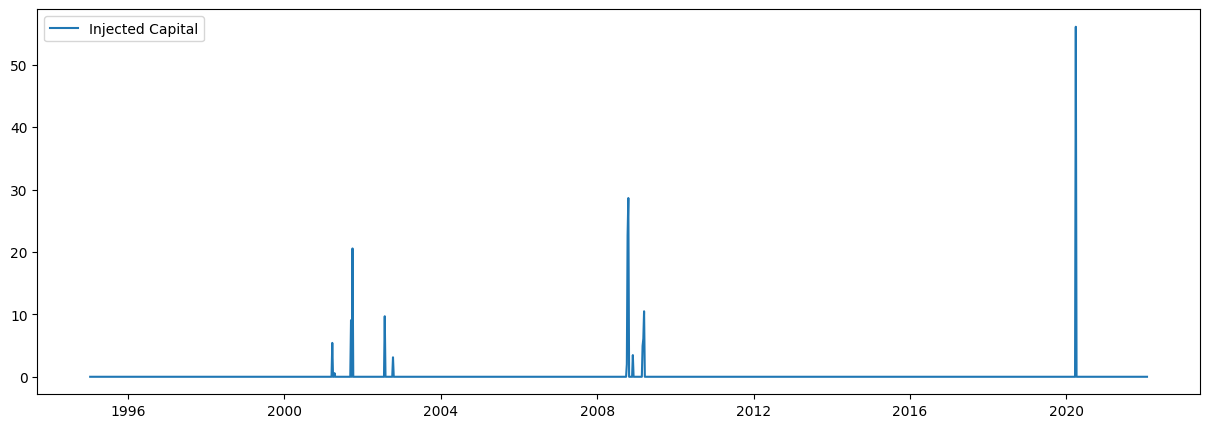

In [9]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(111)
plt.plot(rr.index, tipp.margin_trigger, label = 'Injected Capital')
plt.legend()
plt.show()